<a href="https://colab.research.google.com/github/onurerdogan2001/ie423tasks/blob/main/notebooks/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

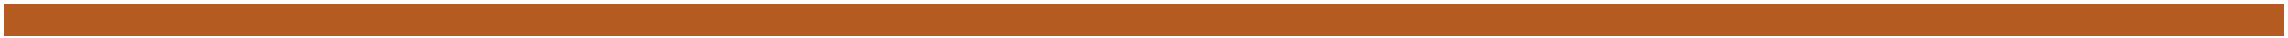

## <font color='#475468'> IE423 TASK 6</font>
### <font color='#475468'> Onur Erdoğan 21903313</font>

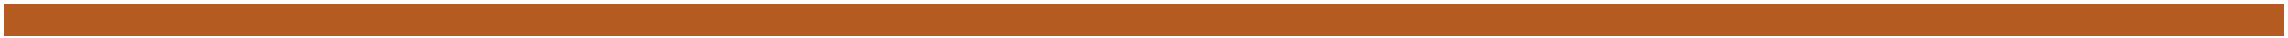

## Initialize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfRet =  pd.read_csv('/content/drive/MyDrive/yazokulu/sales.csv', encoding = "ISO-8859-1")

In [4]:
dfRet.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
import pandas as pd


nan_counts = dfRet.isna().sum()
print(nan_counts)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [7]:
dfRet = dfRet.fillna(0)

## Prepare Data

In [8]:
# Calculate row total amount
dfRet['Total Amount'] = (dfRet['Product_Category_1'] * dfRet['Purchase'] +
                  dfRet['Product_Category_2'] * dfRet['Purchase'] +
                  dfRet['Product_Category_3'] * dfRet['Purchase'])


dfRet.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Total Amount
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,25110.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,319200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422,17064.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057,27482.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969,63752.0


In [9]:
# Aggregate by customer ID
dfRtc = (dfRet.groupby('User_ID').agg({'Product_ID':'nunique','Total Amount':'sum'})
             .rename(columns={'Product_ID':'product_count', 'Total Amount':'product_amt_total'}) # Fix: Rename 'Total Amount' to 'product_amt_total'
            )
dfRtc

,product_count,product_amt_total
User_ID,,
1000001,35,4913268.0
1000002,77,13321324.0
1000003,29,4225254.0
1000004,14,3684635.0
1000005,106,11694426.0
...,...,...
1006036,514,66738474.0
1006037,122,21223728.0
1006038,12,1589031.0


In [10]:
# Scale data

X = dfRtc
X[X.columns] = scale(X[X.columns])

Text(0, 0.5, 'amt_total')

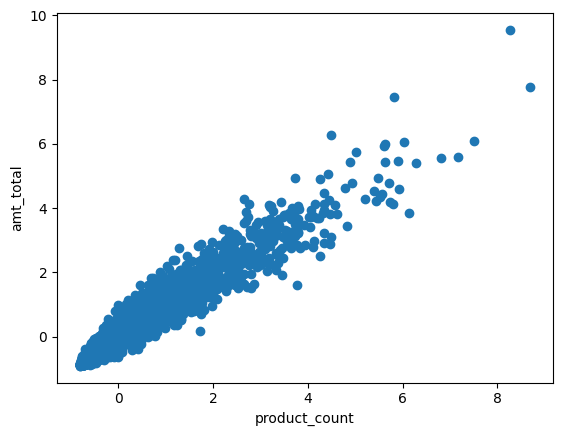

In [12]:
# Visualize scatterplot

plt.scatter(X['product_count'],X['product_amt_total']) # Access using the correct column name 'product_count'
plt.xlabel('product_count')
plt.ylabel('amt_total')

### K-Means Clustering

In [13]:
# Build k-Means Clustering model

from sklearn.cluster import KMeans

mdlKmcRtc = KMeans(n_clusters=3, random_state=1)
mdlKmcRtc.fit(X)
kMeans_labels = mdlKmcRtc.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering')

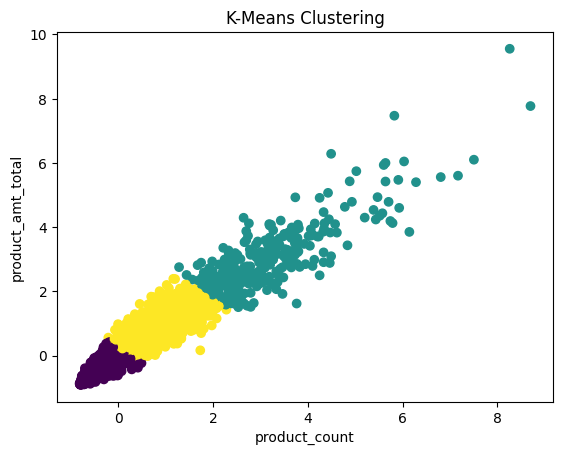

In [15]:
# Display k-Means cluster on scatter plot

plt.scatter(X['product_count'],X['product_amt_total'], c=kMeans_labels)
plt.xlabel('product_count')
plt.ylabel('product_amt_total')
plt.title('K-Means Clustering')

In [16]:
# Evaluate quality of clusters
from sklearn.metrics import silhouette_score

silhouette_score(X, mdlKmcRtc.labels_)

0.6486919721334832

It can be said that 0.64 is fairly good.

In [17]:
# Function for K-means Clustering
def cluster_kMeans(X, k):
    mdlKmcRtc = KMeans(n_clusters=k, random_state=1)
    mdlKmcRtc.fit(X)
    kMeans_labels = mdlKmcRtc.labels_
    kMeans_sil_score = silhouette_score(X, mdlKmcRtc.labels_)
    return (kMeans_labels, kMeans_sil_score)

In [18]:
# Iterate over different values of k to determine best silhouette score

for k in [2, 3, 4, 5, 6]:
    kMeans_labels, kMeans_sil_score = cluster_kMeans(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', kMeans_sil_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  2 		 Silhouette Score:  0.7163093870410772


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  3 		 Silhouette Score:  0.6486919721334832


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  4 		 Silhouette Score:  0.5960462374201888


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  5 		 Silhouette Score:  0.5631531178820891


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k:  6 		 Silhouette Score:  0.5520063847315051


The best cluster size seems to be '2' since its score is highest as 0.71.


Let's see if we can improve the customer segmentation by starting with each customer in its own cluster and then *Hierarchically* grouping them together... (This is only possible when the dataset is small)

### Hierarchical Clustering

In [19]:
# Generate linkages between data points
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, 'ward')

Text(0.5, 1.0, 'Hierarchical Clustering')

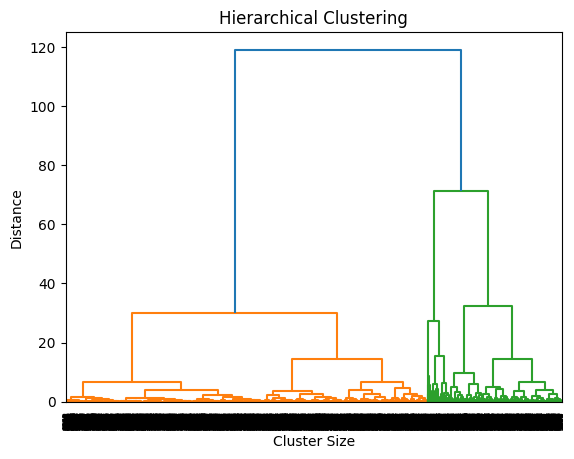

In [20]:
# Visualize Dendrogram of Clusters

hierarchy.dendrogram(Z)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering')

2 Clusters are ideal but I think 3 is ok also.

In [21]:
# Build Hierarchical Clustering model
from sklearn.cluster import AgglomerativeClustering

mdlHrcRtc = AgglomerativeClustering(n_clusters=3)
mdlHrcRtc.fit(X)
hClust_labels = mdlHrcRtc.labels_

In [22]:
silhouette_score(X, mdlHrcRtc.labels_)

0.6538076876328744

Text(0.5, 1.0, 'Hierarchical Clustering')

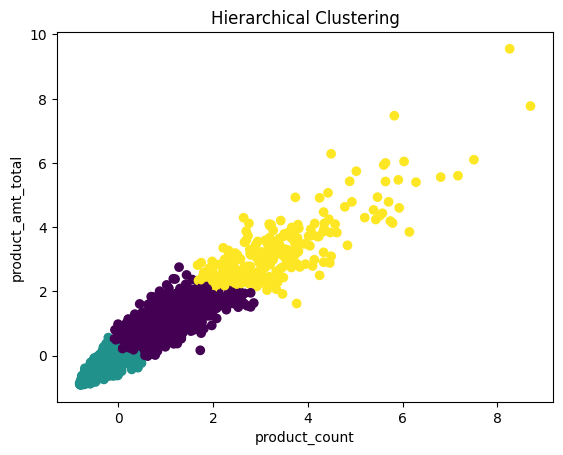

In [24]:
# Display Hierarchical cluster on scatter plot

plt.scatter(X['product_count'],X['product_amt_total'],c=hClust_labels)
plt.xlabel('product_count')
plt.ylabel('product_amt_total')
plt.title('Hierarchical Clustering')

In [25]:
# Function for Hierarchical Clustering
def cluster_hierarchy(X, k):
    mdlHrcRtc = AgglomerativeClustering(n_clusters=k)
    mdlHrcRtc.fit(X)
    hClust_labels = mdlHrcRtc.labels_
    hClust_sil_score = silhouette_score(X, mdlHrcRtc.labels_)
    return (hClust_labels, hClust_sil_score)

In [26]:
# Iterate over different values of k to determine best silhouette score

for k in [2, 3, 4, 5, 6]:
    hClust_labels, hClust_sil_score = cluster_hierarchy(X,k)
    print('k: ',k,'\t\t', 'Silhouette Score: ', hClust_sil_score)

k:  2 		 Silhouette Score:  0.6526450419044797
k:  3 		 Silhouette Score:  0.6538076876328744
k:  4 		 Silhouette Score:  0.5942938760987468
k:  5 		 Silhouette Score:  0.5066614646507195
k:  6 		 Silhouette Score:  0.5110315956510707


The ideal cluster size is '3' but its very close with 2 clusters. Thus, previous comment was true.

In [27]:
# Build DBScan model

from sklearn.cluster import DBSCAN

mdlDbsRtc = DBSCAN(eps=0.2)
mdlDbsRtc.fit(X)
dbscan_labels = mdlDbsRtc.labels_

In [28]:
silhouette_score(X, dbscan_labels)

0.7300357786444162

It looks good since its 0.73

In [29]:
# calculate number of clusters
dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
dbscan_clusters

2

In [30]:
# calculate number of anomalies
dbscan_anomalies = list(dbscan_labels).count(-1)
dbscan_anomalies

68

Text(0.5, 1.0, 'DBScan Clustering')

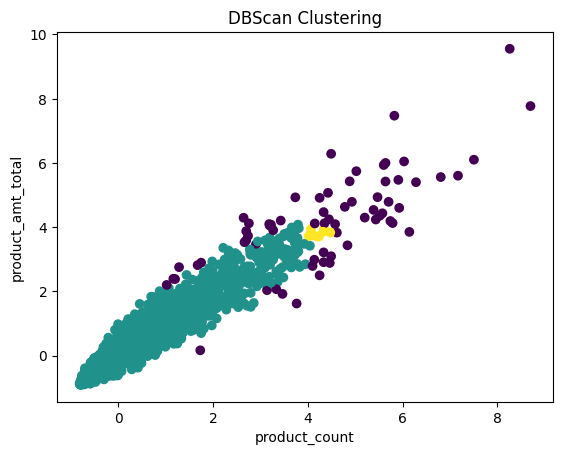

In [32]:
# Display DBScan cluster on scatter plot

plt.scatter(X['product_count'],X['product_amt_total'],c=dbscan_labels)
plt.xlabel('product_count')
plt.ylabel('product_amt_total')
plt.title('DBScan Clustering')

In [33]:
# Function for DBScan Clustering

def cluster_dbscan(X, e):
    mdlDbsRtc = DBSCAN(eps=e)
    mdlDbsRtc.fit(X)
    dbscan_labels = mdlDbsRtc.labels_
    dbscan_sil_score = silhouette_score(X, dbscan_labels)

    # count number of clusters and noise points
    dbscan_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    dbscan_anomalies = list(dbscan_labels).count(-1)
    return(dbscan_clusters, dbscan_anomalies, dbscan_sil_score)

In [34]:
# Iterate over different values of eps to determine best silhouette score

for eps in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    dbscan_clusters, dbscan_anomalies, dbscan_sil_score = cluster_dbscan(X, eps)
    print('eps: ',eps,'\t', 'Clusters: ', dbscan_clusters, '\t', 'Noise: ', dbscan_anomalies, '\t', 'Silhouette Score: ', dbscan_sil_score)

eps:  0.1 	 Clusters:  11 	 Noise:  255 	 Silhouette Score:  0.5708737082090536
eps:  0.2 	 Clusters:  2 	 Noise:  68 	 Silhouette Score:  0.7300357786444162
eps:  0.3 	 Clusters:  2 	 Noise:  34 	 Silhouette Score:  0.7803390845588715
eps:  0.4 	 Clusters:  2 	 Noise:  26 	 Silhouette Score:  0.783170541927546
eps:  0.5 	 Clusters:  2 	 Noise:  19 	 Silhouette Score:  0.7843794691919704
eps:  0.6 	 Clusters:  1 	 Noise:  9 	 Silhouette Score:  0.8336329078232863
eps:  0.7 	 Clusters:  1 	 Noise:  6 	 Silhouette Score:  0.8483615007649964


SAME RESULT: The highest Silhouette Score in the DBScan model is for a cluster size '1', but it really means there would be 2 clusters where the second cluster is a collection of all the outliers.  However, the Hierarchical Clustering model gave better results which makes sense because in this case we don't have reason to believe that density plays a big role.

Even though we may not choose DBScan in this case, it is still useful in determining outliers.  